In [1]:
# Imports
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from scipy.stats import linregress

In [2]:
# Directories - Change as desired
bca_file_path = "C:/Users/plutzer/Box/CellBio-MajorLab/Users/Isaac/Lab Notebook/Lab_data/10-20-2021_IP_attempt_4/BCA_IBP_20211020_103149.xlsx"
figure_base = bca_file_path[:len(bca_file_path)-5]
expt_name = bca_file_path.split('/')[-1].split('.')[0]

In [3]:
# load file
df = pd.read_excel(bca_file_path,header=14)
df = df.set_index('Unnamed: 0')
mat = df.to_numpy()
df.index.names = [' ']
df

,1,2,3,4,5,6,7,8,9,10,11,12
,,,,,,,,,,,,
A,1.549,1.099,1.100,0.184,0.178,0.187,NaN,NaN,NaN,NaN,NaN,NaN
B,0.936,0.923,0.882,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
C,0.994,0.802,0.888,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
D,0.412,0.548,0.792,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
E,0.317,0.373,0.338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
F,0.215,0.201,0.358,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
G,0.186,0.190,0.184,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
H,0.090,0.092,0.092,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Plate setup

# Standards go in the first n cols, using all the rows as shown below
row_order = ['A','B','C','D','E','F','G','H']

##### STANDARDS - listed in ug/mL ##### 
standards = {
    'A':2000,
    'B':1500,
    'C':1000,
    'D':750,
    'E':500,
    'F':250,
    'G':125,
    'H':0
}

# Add standards to ignore if you have some outliers
# ignore = ['A','D']
ignore = []

# Change if needed
num_standard_reps = 3

# Positions of samples
samples_positions = [
    [[0,3],[0,4],[0,5]]
]

# Sample names corresponding to the above positions
samples_names = [
    'lysate'
]

Linear model:   A=0.0005795480098094699[protein]+0.12132522165629128
lysate:
	Mean Absorbance: 0.18299999999999997
	Interpolated Concentration: 106.41875616825025  ug/mL


Text(0, 0.5, 'Net Absorbance (562nm)')

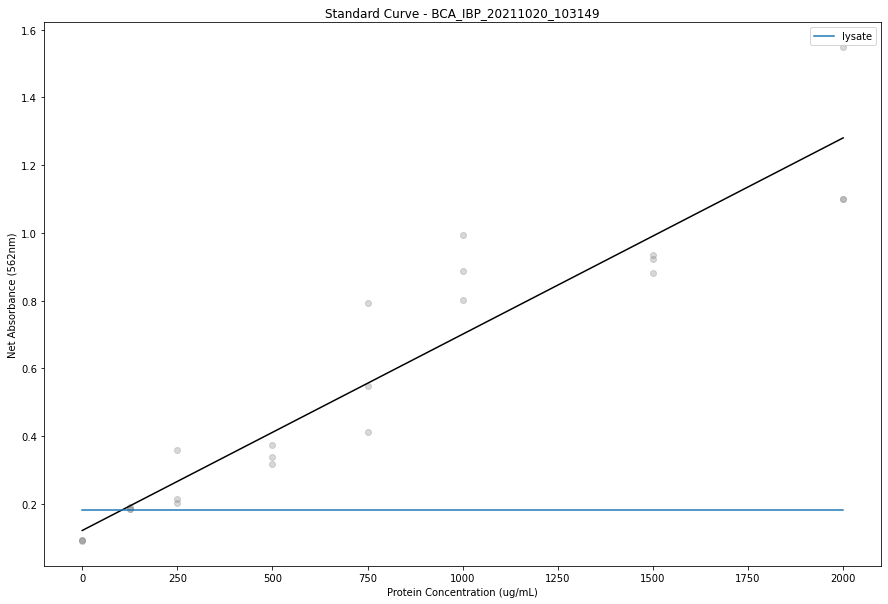

In [5]:
# Generate points for the standard curve
concentrations_x = []
absorbances_y = []
for row in range(len(row_order)):
    if row_order[row] not in ignore:
        concentration = standards[row_order[row]]
        for col in range(num_standard_reps):
            concentrations_x.append(concentration)
            absorbances_y.append(mat[row,col])

# Scatterplot of points
std_curve = plt.figure(figsize = (15,10))
plt.scatter(concentrations_x,absorbances_y,c='grey',alpha=0.3)

# Add a linear regression
slope,intercept,r_val,pval,std_err = linregress(concentrations_x,absorbances_y)
plt.plot([0,2000],[intercept,intercept+slope*2000],c='black')
print('Linear model:   A=' + str(slope) + '[protein]' + '+' + str(intercept))

# Make interpolations for the samples
for samplenum in range(len(samples_positions)):
    sample_name = samples_names[samplenum]
    sample_abs = []
    for row,col in samples_positions[samplenum]:
        sample_abs.append(mat[row,col])
    # Get the mean absorbance and plot as a horizontal line
    plt.plot([0,2000],[np.mean(sample_abs)]*2,label=sample_name)
    print(sample_name + ':')
    print('\t' + 'Mean Absorbance: ' + str(np.mean(sample_abs)))
    print('\t' + 'Interpolated Concentration: ' + str((np.mean(sample_abs)-intercept)/slope) + '  ug/mL')

plt.legend()
plt.title('Standard Curve - ' + expt_name)
plt.xlabel('Protein Concentration (ug/mL)')
plt.ylabel('Net Absorbance (562nm)')

In [6]:
# Run this to save the figure
save_path = figure_base + '.png'
std_curve.savefig(save_path)

In [9]:
# Dilution
sample_conc = 2878
initial_vol = 992
target_conc = 2201

add = (sample_conc*(initial_vol) - target_conc*(initial_vol))/(target_conc)

print('Amount of water to add : ' + str(add))

Amount of water to add : 305.1267605633803


In [10]:
992+113.6

1105.6